# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# URL for Weather Map API call

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data= []

#print to logger
print("Beginning Data Retrieval")
print("-"*15)

#create counters
record_count = 1
set_count = 1
import time
#loop through all the cities in our list
for index, city in enumerate(cities):
    #Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    #endpoint url with each city
    city_url = url + "&q=" + city
    
    #log the url record and set number
    print (f'Processing Record {record_count} of Set {set_count} | {city}')
    time.sleep(3)
    record_count += 1
    
    #API requests for each of the cities
    try:
        #parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #extract out max temp humidity and cloudiness
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        #append the city info into city data list
        city_data.append({
            "City":city,
            "Lat":city_lat,
            "Lng":city_lng,
            "Max Temp":city_max_temp,
            "Humidity":city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed":city_wind,
            "Country": city_country,
            "Date":city_date   
        })
    
    except:
        print("City not found. Skipping ....")
        pass
    
#loading complete
print("--------------------")
print("Data Retrieval Complete")
print("--------------------")
        





Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping ....
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | shasta lake
Processing Record 10 of Set 1 | ubatuba
Processing Record 11 of Set 1 | borogontsy
Processing Record 12 of Set 1 | hobyo
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ardistan
City not found. Skipping ....
Processing Record 17 of Set 1 | caracuaro
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping ....
Processing Record 19 of Set 1 | redmond
Processing Record 20 of Set 1 | troitsko-pechorsk
Processing Record 21 of Set 1 | pakw

Processing Record 32 of Set 4 | oriximina
Processing Record 33 of Set 4 | broome
Processing Record 34 of Set 4 | amga
Processing Record 35 of Set 4 | touros
Processing Record 36 of Set 4 | kununurra
Processing Record 37 of Set 4 | voi
Processing Record 38 of Set 4 | coxim
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping ....
Processing Record 40 of Set 4 | omboue
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | anloga
Processing Record 46 of Set 4 | grand-santi
Processing Record 47 of Set 4 | alpena
Processing Record 48 of Set 4 | mae sot
Processing Record 49 of Set 4 | iqaluit
Processing Record 0 of Set 5 | purranque
Processing Record 1 of Set 5 | belyy yar
Processing Record 2 of Set 5 | jinchengjiang
City not found. Skipping ....
Processing Record 3 of Set 5 | mapastepec
Processing Record 4 of Set 5 | tautira
Processing Reco

Processing Record 21 of Set 8 | abu samrah
Processing Record 22 of Set 8 | baykit
Processing Record 23 of Set 8 | baruun-urt
Processing Record 24 of Set 8 | artyshta
Processing Record 25 of Set 8 | port hope
Processing Record 26 of Set 8 | itarema
Processing Record 27 of Set 8 | port hawkesbury
Processing Record 28 of Set 8 | kasungu
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | flin flon
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | rosario
Processing Record 35 of Set 8 | lolua
City not found. Skipping ....
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | huarmey
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | makakilo city
Processing Record 40 of Set 8 | bintulu
Processing Record 41 of Set 8 | natitingou
Processing Record 42 of Set 8 | shenzhen
Processing Record 43 of Set 8 | kogon
Processing 

Processing Record 7 of Set 12 | del rio
Processing Record 8 of Set 12 | kazalinsk
City not found. Skipping ....
Processing Record 9 of Set 12 | omaruru
Processing Record 10 of Set 12 | devils lake
Processing Record 11 of Set 12 | vao
Processing Record 12 of Set 12 | taonan
Processing Record 13 of Set 12 | riyadh
Processing Record 14 of Set 12 | talaya
Processing Record 15 of Set 12 | keti bandar
Processing Record 16 of Set 12 | sangmelima
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | znamenskoye
Processing Record 19 of Set 12 | east london
Processing Record 20 of Set 12 | gladstone
Processing Record 21 of Set 12 | monte patria
Processing Record 22 of Set 12 | avezzano
Processing Record 23 of Set 12 | istmina
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | santa barbara
Processing Record 26 of Set 12 | vilhena
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | tori
Processing Record 29 of Set 12 | awbar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#convert array of JSON into pandas
city_data_df = pd.DataFrame(city_data)

#Extract relevant fields from the data frame
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


#Export the city data into a .csv.
city_data_df.to_csv(output_data_file, index_label='City_ID')


city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [24]:
#Display the city Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,43.03,83,71,14.54,GL,1628243435
1,chokurdakh,70.6333,147.9167,43.97,76,100,9.26,RU,1628243438
2,nome,64.5011,-165.4064,51.87,87,90,10.36,US,1628243441
3,atuona,-9.8000,-139.0333,77.29,79,19,13.98,PF,1628243445
4,padang,-0.9492,100.3543,87.85,69,60,3.60,ID,1628243449


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
city_data_humidity_df = city_data_df.loc[(city_data_df['Humidity'] > 100)]
city_data_humidity_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#No humidity >100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

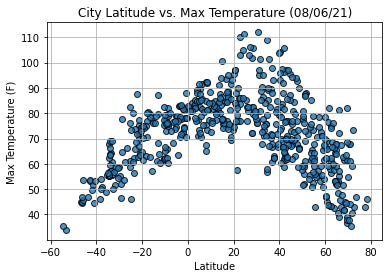

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidth=1, marker ='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('output_data/Fig1.png')

#Show plot
plt.show()




## Latitude vs. Humidity Plot

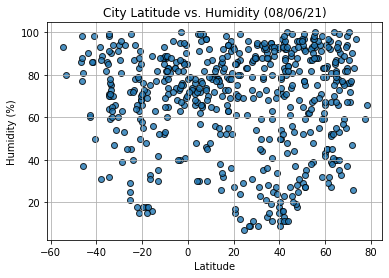

In [35]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidth=1, marker ='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('output_data/Fig2.png')

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

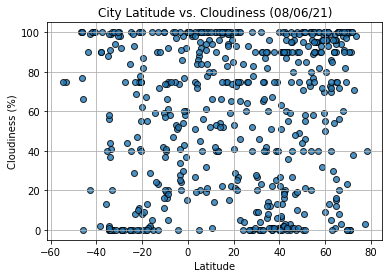

In [36]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidth=1, marker ='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('output_data/Fig3.png')

#Show plot
plt.show()

## Latitude vs. Wind Speed Plot

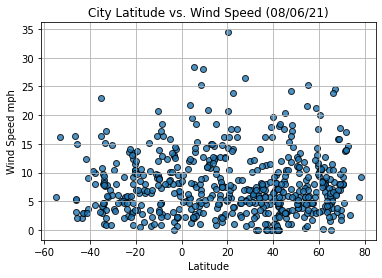

In [37]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidth=1, marker ='o',
           alpha=0.8, label='Cities')

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('output_data/Fig4.png')

#Show plot
plt.show()

## Linear Regression

In [48]:
#OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regressions on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-squared is: {rvalue}')
    plt.show()




In [49]:
#Northern and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.626692359392303


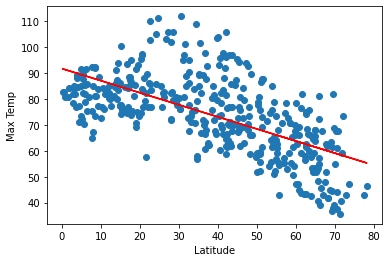

In [50]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7839579389903588


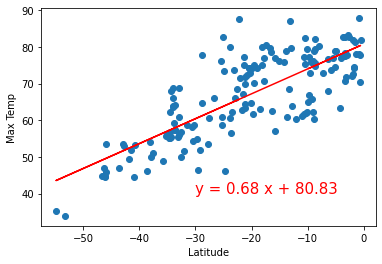

In [52]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010344523856748057


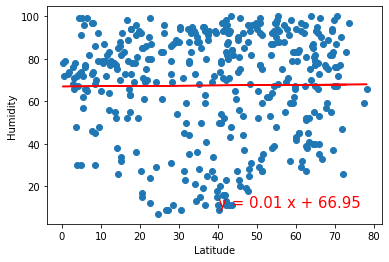

In [53]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.01119630670214178


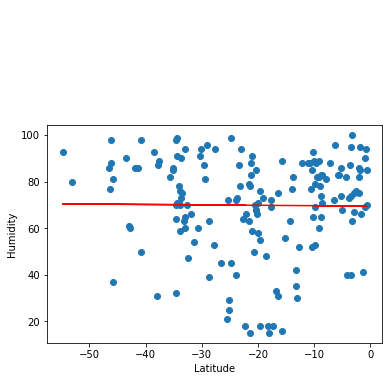

In [54]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.011519813975742468


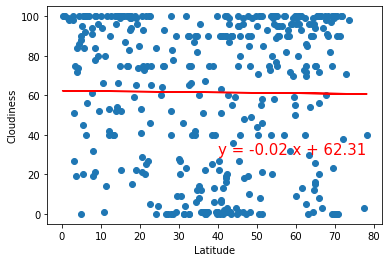

In [55]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05766033609555552


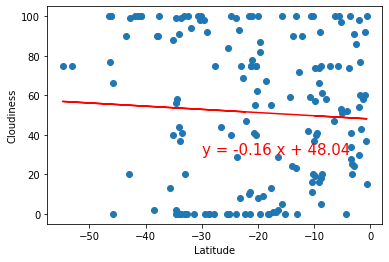

In [56]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06462790577943926


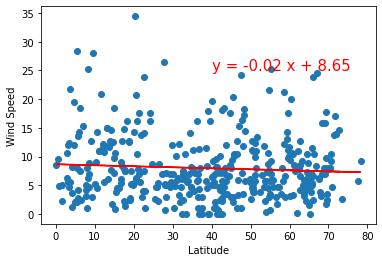

In [57]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050889201747779444


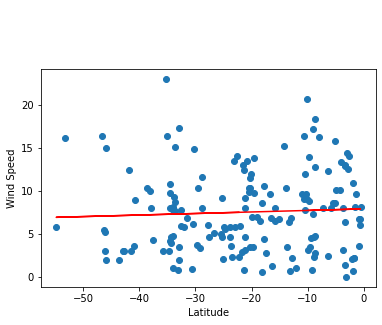

In [58]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))